# 

# Model Analysis
**Ethan Santos**

**Purpose**: This file/notebook is intended to explore the different classification models which can help identify and predict whether a subject was learning or not when reading the average Alpha/Beta waves found in different channles.

In [31]:
# Importing necessary libraries
import pandas as pd
import openpyxl
import warnings 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Importing Model Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier
# SKLearn Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 

warnings.filterwarnings('ignore')
pd.set_option("display.min_rows", None, "display.max_columns", None)

# Data Pre-Processing
In this section, we organize our data before going into how it performs with different models

In [32]:
MASTER_SET = r'data/masterSet.xlsx'

In [33]:
df = pd.read_excel(MASTER_SET, engine = 'openpyxl')
df.dropna()
df

,Channel,Alpha Avg,Beta Avg,Results
0,CH4,114331.520808,255524.116558,2
1,Ch8,29686.422100,308732.605300,1
2,Ch12,69606.867990,177305.367015,1
3,Original,63571.265100,266100.804844,0
4,Ch4,36828.760174,338640.562034,0
5,Ch8,107256.516550,559129.341555,0
6,Ch12,142604.898094,465096.841703,0
7,Original,89002.901497,570712.261626,0
8,CH4,12097.600884,8196.066871,3
9,CH8,35402.550012,343315.958391,3


In [34]:
df.loc[df.Results <= 1, 'Results'] = 1
df.loc[df.Results >= 2, 'Results'] = 0
df

,Channel,Alpha Avg,Beta Avg,Results
0,CH4,114331.520808,255524.116558,0
1,Ch8,29686.422100,308732.605300,1
2,Ch12,69606.867990,177305.367015,1
3,Original,63571.265100,266100.804844,1
4,Ch4,36828.760174,338640.562034,1
5,Ch8,107256.516550,559129.341555,1
6,Ch12,142604.898094,465096.841703,1
7,Original,89002.901497,570712.261626,1
8,CH4,12097.600884,8196.066871,0
9,CH8,35402.550012,343315.958391,0


In [35]:
df = df.drop(columns = 'Channel', axis = 1)

# KNN Evaluation

We first begin by splitting our data set 80:20. We can that evaluate different KNN Models with different K number of neighbours by looking at its mean accuracy, as well as its standard deviation.

In [36]:
# Splitting the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(df, df['Results'], test_size = 0.2, random_state = 42)

In [37]:
n = 0
k_value = 0
K_Neighbours = []
Accuracy = []
Deviation = []
while k_value != 13:
    k_value = 2 * n + 1
    n += 1
    KNN_Model = KNeighborsClassifier(n_neighbors = k_value)
    scores = cross_val_score(KNN_Model, X_train, y_train, cv = 10)
    K_Neighbours.append(k_value)
    Accuracy.append(scores.mean())
    Deviation.append(scores.std())
    print("K Neighbours: %0.2f, Accuracy: %0.2f (+/- %0.2f)" % (k_value, scores.mean(), scores.std() * 2))

K Neighbours: 1.00, Accuracy: 0.72 (+/- 0.29)
K Neighbours: 3.00, Accuracy: 0.75 (+/- 0.28)
K Neighbours: 5.00, Accuracy: 0.75 (+/- 0.28)
K Neighbours: 7.00, Accuracy: 0.77 (+/- 0.15)
K Neighbours: 9.00, Accuracy: 0.75 (+/- 0.21)
K Neighbours: 11.00, Accuracy: 0.75 (+/- 0.14)
K Neighbours: 13.00, Accuracy: 0.77 (+/- 0.13)


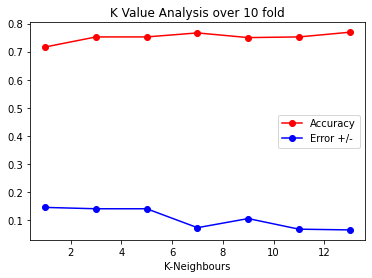

In [38]:

plt.title("K Value Analysis over 10 fold")
plt.xlabel("K-Neighbours")
plt.plot(K_Neighbours, Accuracy, marker = 'o', label = "Accuracy", color = "red")
plt.plot(K_Neighbours, Deviation, marker = 'o', label = "Error +/-", color = "blue")
plt.legend()
plt.show()

# SVM Evaluation

We split our dataset 80:20 and we analyze on how well an SVM model would run on different parameters.

In [39]:
# Splitting the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(df, df['Results'], test_size = 0.2, random_state = 42)

# Model Assessments

In [40]:
# Splitting the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(df, df['Results'], test_size = 0.2, random_state = 42)

In [41]:
def model_assessment(model, model_name):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print('Accuracy', model_name, metrics.accuracy_score(y_test, prediction), '\n')

In [42]:
# KNN Evaluation
KNN_Model = KNeighborsClassifier(n_neighbors = 13)
model_assessment(KNN_Model, "KNN Model")

# Support Vector Machine (SVM)
svm = SVC(decision_function_shape = "ovo")
model_assessment(svm, "Support Vector Machine")


Accuracy KNN Model 0.75 

Accuracy Support Vector Machine 0.75 

